In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean dataset
df = pd.read_csv("../data/Telco-Customer-Churn-Clean.csv")

print(df.head())
print(df['Churn'].value_counts())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

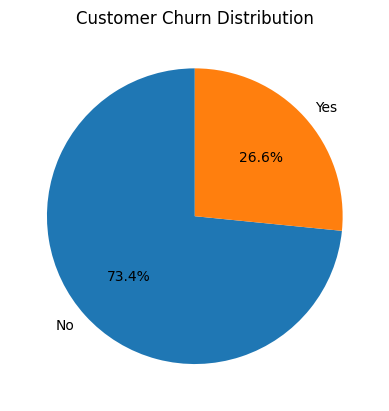

In [2]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Churn Distribution")
plt.show()


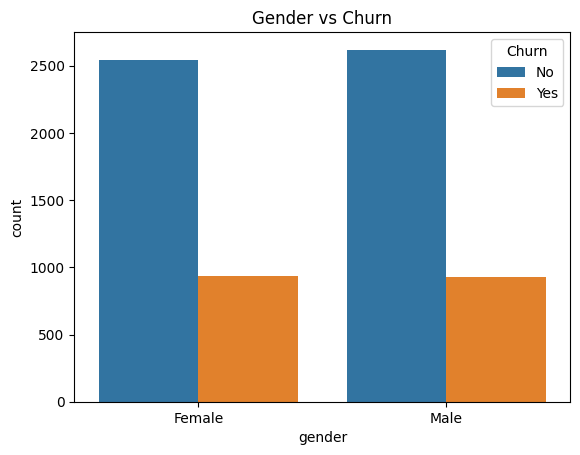

In [3]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Gender vs Churn")
plt.show()


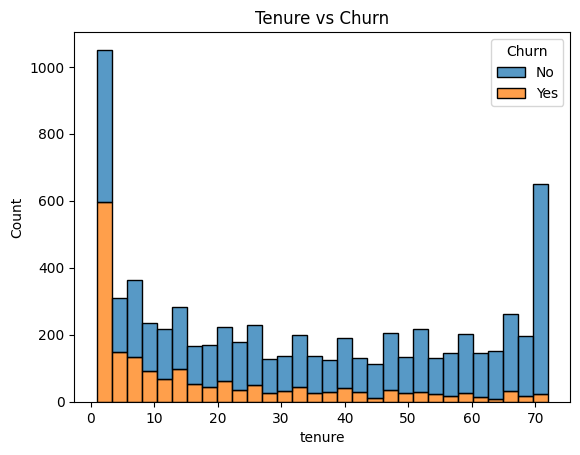

In [4]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure vs Churn")
plt.show()


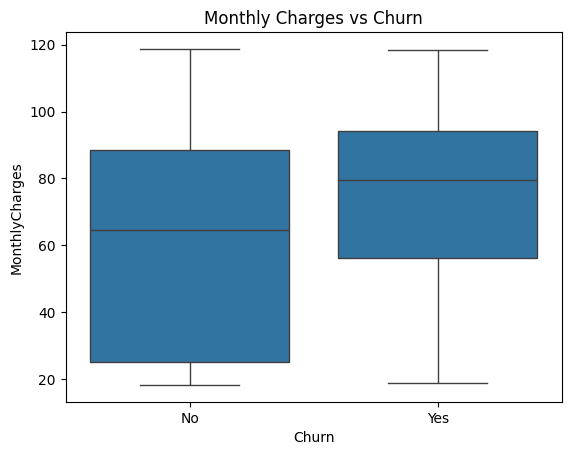

In [5]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x600 with 0 Axes>

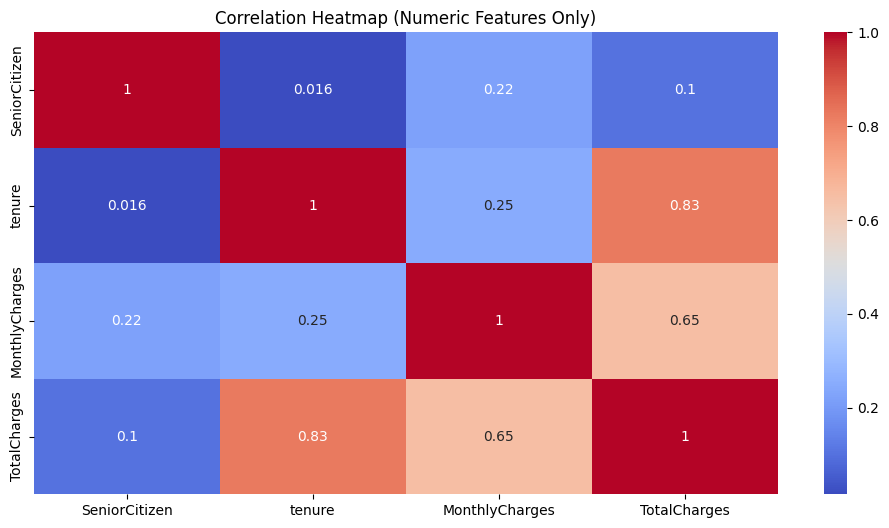

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


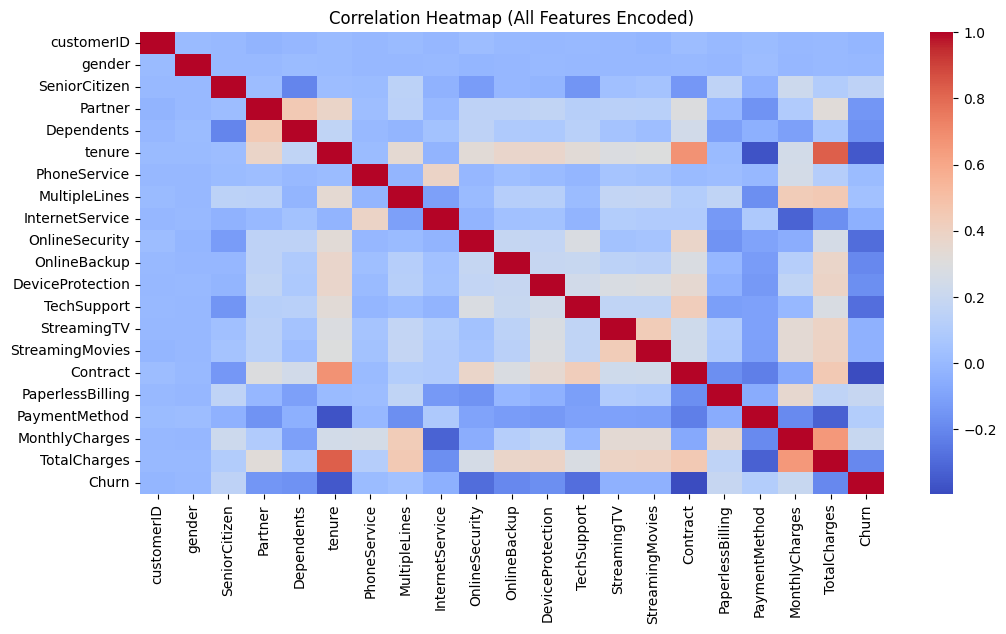

In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()
